In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

In [154]:
def preprocess_embedding(z):
    """Pre-process embedding."""
    # Normalize coordinate system.
    gmm = GaussianMixture(n_components=1, covariance_type='spherical')
    gmm.fit(z)
    mu = gmm.means_[0]
    z_norm = z - mu
    max_val = np.max(np.abs(z_norm))
    z_norm /= max_val
    return z_norm

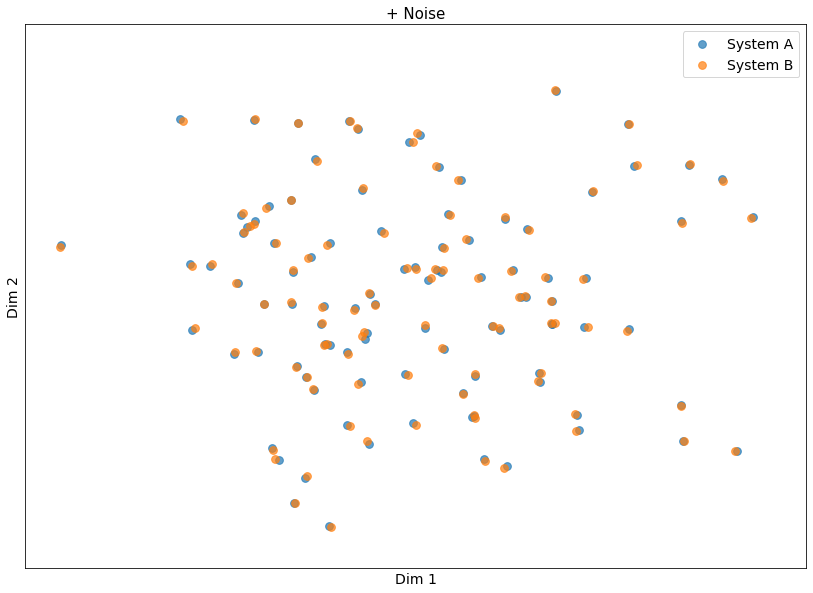

In [155]:
n_concept = 100
n_dim = 2

z_0, _ = make_blobs(n_samples=n_concept, centers=1, n_features=n_dim, random_state=0)
z_1 = z_0 

z_0 = preprocess_embedding(z_0)
z_1 = preprocess_embedding(z_1)

z_1 += 0.02*(np.random.rand(n_concept, n_dim)-1/2)

plt.figure(figsize=(14,10))

plt.title('+ Noise', fontsize=15)
plt.scatter(z_0[:,0], z_0[:,1], s=60, alpha=0.7)
plt.scatter(z_1[:,0], z_1[:,1], s=60, alpha=0.7)
plt.xlabel('Dim 1', fontsize=14)
plt.ylabel('Dim 2', fontsize=14)
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.xticks([])
plt.yticks([])
plt.legend(['System A','System B'], prop={'size':14})
plt.savefig('assets/noise.pdf')

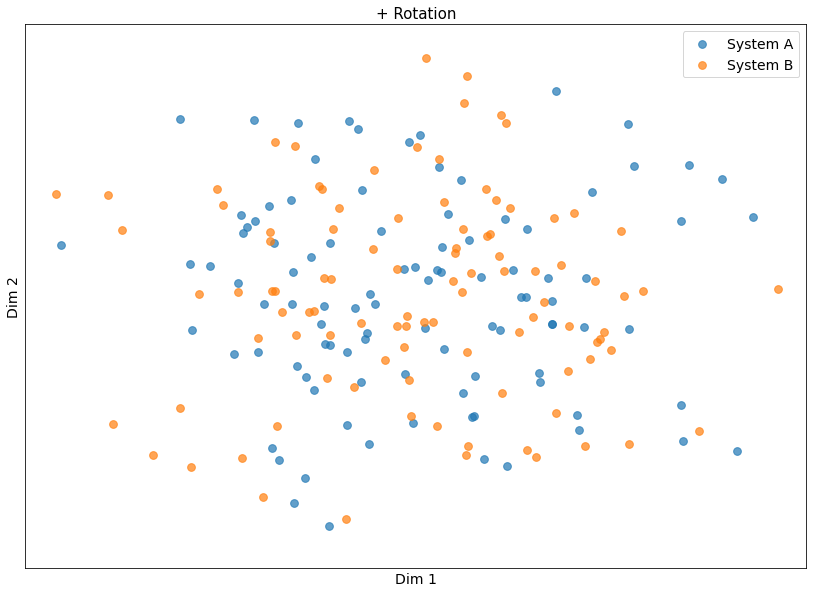

In [156]:
np.random.seed(0)
rot_mat = scipy.stats.special_ortho_group.rvs(z_0.shape[1])
z_1 = np.matmul(z_1, rot_mat)

plt.figure(figsize=(14,10))

plt.title('+ Rotation', fontsize=15)
plt.scatter(z_0[:,0], z_0[:,1], s=60, alpha=0.7)
plt.scatter(z_1[:,0], z_1[:,1], s=60, alpha=0.7)
plt.xlabel('Dim 1', fontsize=14)
plt.ylabel('Dim 2', fontsize=14)
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.xticks([])
plt.yticks([])
plt.legend(['System A','System B'], prop={'size':14})
plt.savefig('assets/rotation.pdf')

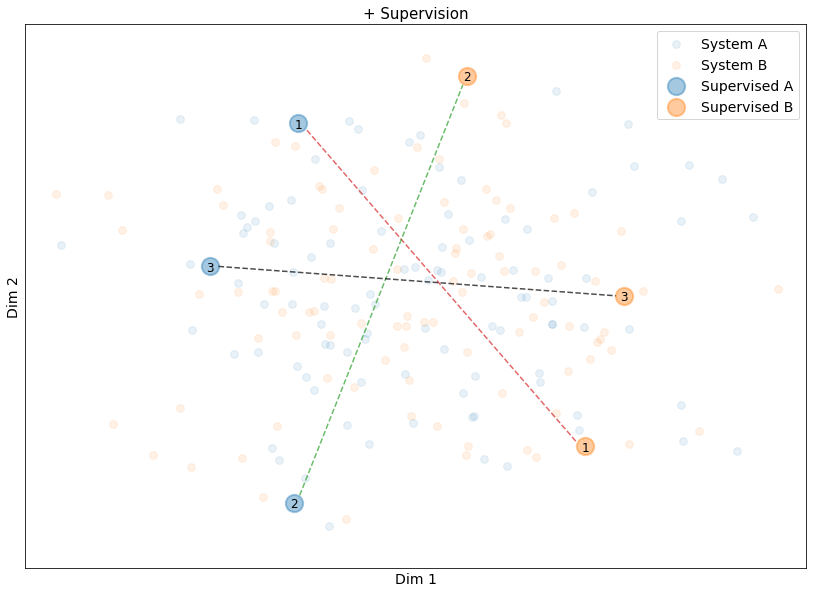

In [201]:
plt.figure(figsize=(14,10))

sup_size = int(n_concept * 0.03)

plt.title('+ Supervision', fontsize=15)

plt.scatter(z_0[sup_size:,0], z_0[sup_size:,1], s=60, alpha=0.1, color='C0')
plt.scatter(z_1[sup_size:,0], z_1[sup_size:,1], s=60, alpha=0.1, color='C1')


offset_x = 0.0108
offset_y = 0.0190

for i in range(sup_size):
    plt.text(z_0[i,0]-offset_x, z_0[i,1]-offset_y, i+1, fontsize=12, color='black')
    plt.text(z_1[i,0]-offset_x, z_1[i,1]-offset_y, i+1, fontsize=12, color='black')

plt.plot([z_0[0,0]+0.025, z_1[0,0]-0.024], [z_0[0,1]-0.03, z_1[0,1]+0.017], ls='--', color='C13', alpha=0.7, label='_nolegend_')
plt.plot([z_0[1,0]+0.015, z_1[1,0]-0.013], [z_0[1,1]+0.03, z_1[1,1]-0.038], ls='--', color='C12', alpha=0.7, label='_nolegend_')
plt.plot([z_0[2,0]+0.025, z_1[2,0]-0.024], [z_0[2,1]+0.00, z_1[2,1]+0.000], ls='--', color='black', alpha=0.7, label='_nolegend_')

# plt.plot([z_0[0,0]+0.025, z_1[0,0]-0.024], [z_0[0,1]-0.03, z_1[0,1]+0.017], ls='--', color='black', alpha=0.7, label='_nolegend_')
# plt.plot([z_0[1,0]+0.015, z_1[1,0]-0.013], [z_0[1,1]+0.03, z_1[1,1]-0.038], ls='--', color='black', alpha=0.7, label='_nolegend_')
# plt.plot([z_0[2,0]+0.025, z_1[2,0]-0.024], [z_0[2,1]+0.00, z_1[2,1]+0.000], ls='--', color='black', alpha=0.7, label='_nolegend_')
 

plt.scatter(z_0[:sup_size,0], z_0[:sup_size,1], s=300, linewidth=2, alpha=0.4, marker='o', color='C0')
plt.scatter(z_1[:sup_size,0], z_1[:sup_size,1], s=300, linewidth=2, alpha=0.4, marker='o', color='C1')


plt.xlabel('Dim 1', fontsize=14)
plt.ylabel('Dim 2', fontsize=14)
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.xticks([])
plt.yticks([])
plt.legend(['System A','System B','Supervised A', 'Supervised B'], prop={'size':14})
plt.savefig('assets/supervision_color.pdf')